In [10]:
using Pkg
Pkg.activate(".")
using Statistics
using LinearAlgebra
using Random
using PyPlot

Activating environment at `~/Documents/02 - Perofessional Files/Misc/Random Notes/04 - Julia Codes for Medium/medium_notes/MediumRandomNotes/Project.toml`


In [2]:
function plot_samples_sigma(Sigma,N;Color="b")
    X = Sigma^(0.5) * randn(3,N);
    fig, (ax1, ax2, ax3) = subplots(1, 3, figsize=(15, 3))
    ax1.plot(X[1,:],X[2,:],".",color="#696773",alpha=0.35)
    ax1.plot(-10:10,(-10:10).*sign(Sigma[1,2]),"--k")
    ax1.set_xlabel("X1")
    ax1.set_ylabel("X2")
    ax1.set_xlim([-3.5,3.5])
    ax1.set_ylim([-3.5,3.5])
    #ax1.grid()
    ax2.plot(X[1,:],X[3,:],".",color="#696773",alpha=0.35)
    ax2.plot(-10:10,(-10:10).*sign(Sigma[1,3]),"--k")
    ax2.set_xlabel("X1")
    ax2.set_ylabel("X3")
    ax2.set_xlim([-3.5,3.5])
    ax2.set_ylim([-3.5,3.5])
    #ax2.grid()
    ax3.plot(X[2,:],X[3,:],".",color=Color,alpha=0.5)
    ax3.plot(-10:10,(-10:10).*sign(Sigma[2,3]),"--k")
    ax3.set_xlabel("X2")
    ax3.set_ylabel("X3")
    ax3.set_xlim([-3.5,3.5])
    ax3.set_ylim([-3.5,3.5])
    #ax3.grid()
    Sigma_hat = (X * X') ./ (N-1)
end

plot_samples_sigma (generic function with 1 method)

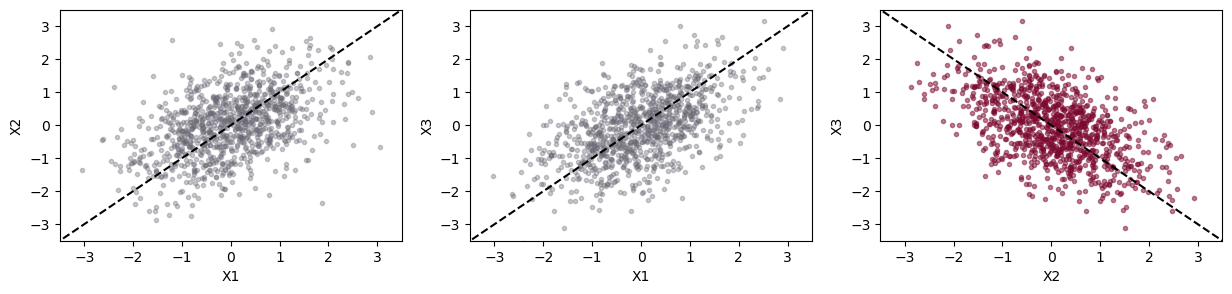

In [3]:
rhos = [0.5,0.5,-0.49]
Sigma = [1 rhos[1] rhos[2];rhos[1] 1 rhos[3];rhos[2] rhos[3] 1]
plot_samples_sigma(Sigma,1000,Color="#7B082E");

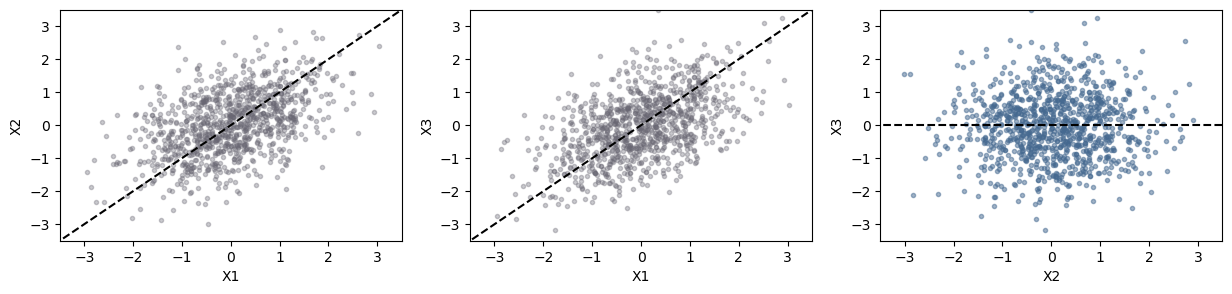

In [4]:
rhos = [0.5,0.5,0]
Sigma = [1 rhos[1] rhos[2];rhos[1] 1 rhos[3];rhos[2] rhos[3] 1]
plot_samples_sigma(Sigma,1000,Color="#456990");

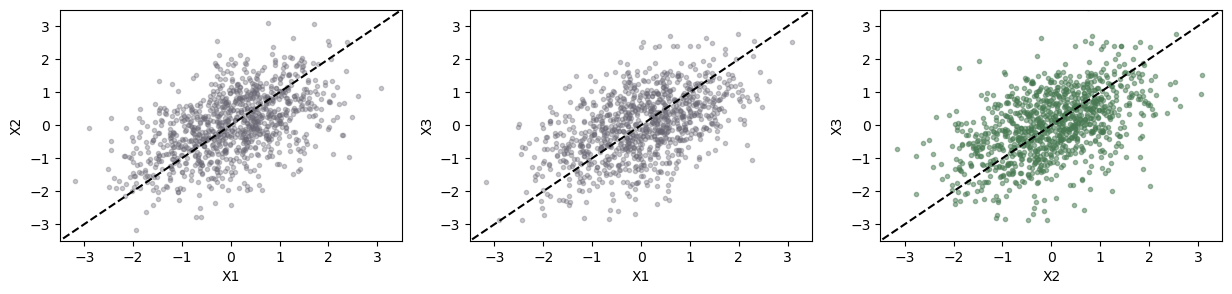

In [5]:
rhos = [0.5,0.5,0.5]
Sigma = [1 rhos[1] rhos[2];rhos[1] 1 rhos[3];rhos[2] rhos[3] 1]
plot_samples_sigma(Sigma,1000,Color="#487952");

In [6]:
function find_bound(rho_1,rho_2; res=0.01)
    rho_temp = -1:res:1;
    s_temp = zeros(size(rho_temp));
    for i = 1:length(rho_temp)
        rhos = [rho_1,rho_2,rho_temp[i]]
        Sigma = [1 rhos[1] rhos[2];rhos[1] 1 rhos[3];rhos[2] rhos[3] 1]
        s_temp[i] = (eigvals(Sigma)[1]>=0)
    end
    rho_d = rho_temp[s_temp.==1][1]
    rho_u = rho_temp[s_temp.==1][end]
    [rho_d,rho_u]
end

find_bound (generic function with 1 method)

In [7]:
rho_set = -0.99:0.01:0.99
rho_up = zeros(length(rho_set),length(rho_set));
rho_do = zeros(length(rho_set),length(rho_set));

In [8]:
for i = 1:length(rho_set)
    rho_1 = rho_set[i]
    for j = 1:length(rho_set)
        rho_2 = rho_set[j]
        rho_temp = find_bound(rho_1,rho_2; res=0.01)
        rho_do[i,j] = rho_temp[1]
        rho_up[i,j] = rho_temp[2]
    end
end

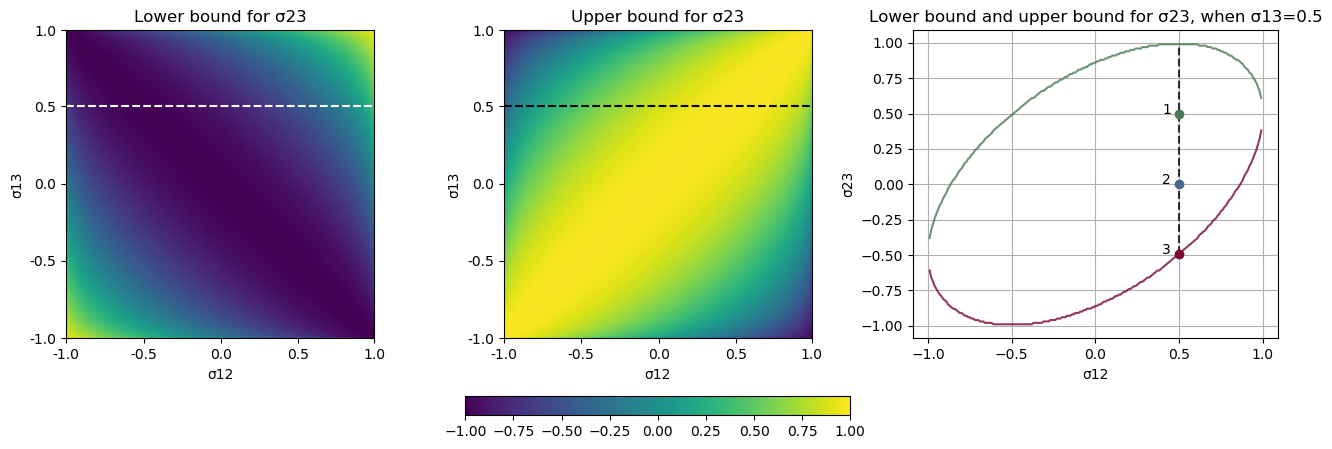

PyObject Text([0.4], [0.5], '1')

In [9]:
fig, (ax1, ax2, ax3) = subplots(1, 3, figsize=(16, 5))

heatmap = ax1.imshow(rho_do,vmin=-1,vmax=1)
ax1.set_xlabel("σ12")
ax1.set_ylabel("σ13")
ax1.set_title("Lower bound for σ23")
ax1.set_xticks([0,50,100,150,199])
ax1.set_xticklabels([-1,-0.5,0,0.5,1])
ax1.set_yticks([0,50,100,150,199])
ax1.set_yticklabels([-1,-0.5,0,0.5,1])
ax1.plot(0:199,ones(size(0:199)).*150,"--w")
ax1.set_xlim([0,199])
ax1.set_ylim([0,199])

ax2.imshow(rho_up,vmin=-1,vmax=1)
ax2.set_xlabel("σ12")
ax2.set_ylabel("σ13")
ax2.set_title("Upper bound for σ23")
ax2.set_xticks([0,50,100,150,199])
ax2.set_xticklabels([-1,-0.5,0,0.5,1])
ax2.set_yticks([0,50,100,150,199])
ax2.set_yticklabels([-1,-0.5,0,0.5,1])
ax2.set_xlim([0,199])
ax2.set_ylim([0,199])
ax2.plot(0:199,ones(size(0:199)).*150,"--k")
ax2.set_xlim([0,199])
ax2.set_ylim([0,199])

fig.colorbar(heatmap,ax=[ax1,ax2,ax3],orientation="horizontal", fraction=0.05)


ax3.grid()
ax3.plot(rho_set,rho_do[150,:],color="#7B082E",alpha=0.8)
ax3.plot(rho_set,rho_up[150,:],color="#487952",alpha=0.8)
ax3.set_xlabel("σ12")
ax3.set_ylabel("σ23")
ax3.set_title("Lower bound and upper bound for σ23, when σ13=0.5")
ax3.plot([0.5,0.5],[rho_do[150,150],rho_up[150,150]],"--k",alpha=0.8)
ax3.plot([0.5],[-0.49],"o",color="#7B082E")
ax3.text([0.4],[-0.49],"3")
ax3.plot([0.5],[0],"o",color="#456990")
ax3.text([0.4],[0],"2")
ax3.plot([0.5],[0.5],"o",color="#487952")
ax3.text([0.4],[0.5],"1")